In [2]:
import os
classes = [a for a in os.listdir('genres') if '.' not in a]
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

In [4]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
s_train = get_data('spectrogram/train')
s_val = get_data('spectrogram/test')

<ipython-input-3-4b6cdbd5c0d3>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [5]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in s_train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in s_val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [7]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [8]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'],steps_per_execution=16)

In [9]:
history1=model.fit(x_train,y_train,epochs = 150, validation_data = (x_val, y_val),validation_steps=25)

Epoch 1/150


C:\anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 14s 712ms/step - loss: 2.3507 - accuracy: 0.1167 - val_loss: 2.3339 - val_accuracy: 0.1200
Epoch 2/150
19/19 [==============================] - 14s 757ms/step - loss: 2.3044 - accuracy: 0.1333 - val_loss: 2.2627 - val_accuracy: 0.1950
Epoch 3/150
19/19 [==============================] - 15s 781ms/step - loss: 2.2333 - accuracy: 0.1517 - val_loss: 2.2137 - val_accuracy: 0.1575
Epoch 4/150
19/19 [==============================] - 14s 751ms/step - loss: 2.1280 - accuracy: 0.2267 - val_loss: 2.1513 - val_accuracy: 0.1750
Epoch 5/150
19/19 [==============================] - 14s 744ms/step - loss: 1.9793 - accuracy: 0.2967 - val_loss: 2.0077 - val_accuracy: 0.2925
Epoch 6/150
19/19 [==============================] - 15s 804ms/step - loss: 1.8361 - accuracy: 0.3417 - val_loss: 1.9819 - val_accuracy: 0.2200
Epoch 7/150
19/19 [==============================] - 14s 739ms/step - loss: 1.7408 - accuracy: 0.3750 - val_loss: 1.9476 - val_accuracy: 0.2525
Epoc

19/19 [==============================] - 12s 634ms/step - loss: 0.0731 - accuracy: 0.9933 - val_loss: 2.0534 - val_accuracy: 0.5050
Epoch 114/150
19/19 [==============================] - 12s 633ms/step - loss: 0.0768 - accuracy: 0.9850 - val_loss: 2.1751 - val_accuracy: 0.4925
Epoch 115/150
19/19 [==============================] - 12s 634ms/step - loss: 0.0525 - accuracy: 1.0000 - val_loss: 2.0738 - val_accuracy: 0.5050
Epoch 116/150
19/19 [==============================] - 12s 640ms/step - loss: 0.0577 - accuracy: 0.9950 - val_loss: 2.1173 - val_accuracy: 0.4900
Epoch 117/150
19/19 [==============================] - 13s 664ms/step - loss: 0.0543 - accuracy: 0.9933 - val_loss: 2.1535 - val_accuracy: 0.5050
Epoch 118/150
19/19 [==============================] - 12s 649ms/step - loss: 0.0643 - accuracy: 0.9917 - val_loss: 2.1783 - val_accuracy: 0.4800
Epoch 119/150
19/19 [==============================] - 13s 690ms/step - loss: 0.0580 - accuracy: 0.9967 - val_loss: 2.1630 - val_accuracy:

In [10]:
import pickle
model.save_weights('cnn_model_sp_3.pb')
pickle.dump(history1.history,open('cnn_model_sp_3.pb','wb'))

In [11]:
predictions = np.argmax(model.predict(x_val), axis=-1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.37      0.62      0.46        40
   classical       0.85      0.88      0.86        40
     country       0.34      0.35      0.35        40
       disco       0.48      0.40      0.44        40
      hiphop       0.39      0.55      0.46        40
        jazz       0.71      0.42      0.53        40
       metal       0.82      0.68      0.74        40
         pop       0.78      0.62      0.69        40
      reggae       0.37      0.33      0.35        40
        rock       0.27      0.25      0.26        40

    accuracy                           0.51       400
   macro avg       0.54      0.51      0.51       400
weighted avg       0.54      0.51      0.51       400



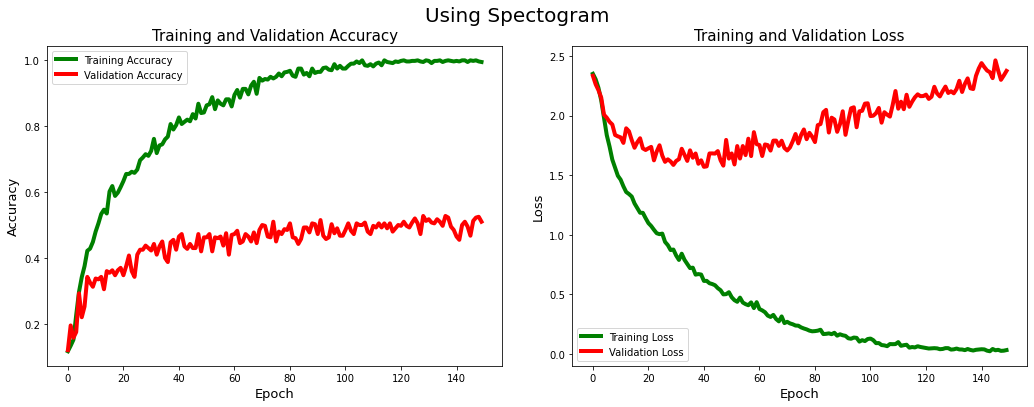

<Figure size 432x288 with 0 Axes>

In [12]:
import pickle
history1 = pickle.load(open('cnn_model_sp_3.pb','rb'))
acc = history1['accuracy']
val_acc = history1['val_accuracy']
loss = history1['loss']
val_loss = history1['val_loss']

epochs_range = range(150)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = 'green', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=15)
ax1.set_ylabel('Accuracy',fontsize=13)
ax1.set_xlabel('Epoch',fontsize=13)

ax2.plot(epochs_range, loss, label='Training Loss',c = 'green', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=15)
ax2.set_ylabel('Loss',fontsize=13)
ax2.set_xlabel('Epoch',fontsize=13)
fig.tight_layout(pad=3.0)
fig.suptitle('Using Spectogram', fontsize=20)
plt.show()
plt.savefig('specto.png')
plt.clf()

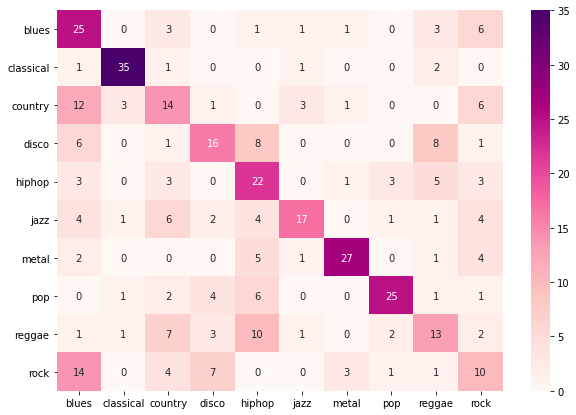

In [13]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png')

In [14]:
w_train = get_data('wavelets/train')
w_val = get_data('wavelets/test')

<ipython-input-4-4b6cdbd5c0d3>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [15]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in w_train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in w_val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [17]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)      

In [18]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'],steps_per_execution=16)

In [19]:
history2=model.fit(x_train,y_train,epochs = 150, validation_data = (x_val, y_val),validation_steps=25)

Epoch 1/150


C:\anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 33s 2s/step - loss: 2.2925 - accuracy: 0.1200 - val_loss: 2.2542 - val_accuracy: 0.1325
Epoch 2/150
19/19 [==============================] - 29s 2s/step - loss: 2.1548 - accuracy: 0.1967 - val_loss: 2.1895 - val_accuracy: 0.1800
Epoch 3/150
19/19 [==============================] - 29s 2s/step - loss: 2.0111 - accuracy: 0.2533 - val_loss: 2.1615 - val_accuracy: 0.1575
Epoch 4/150
19/19 [==============================] - 28s 1s/step - loss: 1.8998 - accuracy: 0.3350 - val_loss: 2.1488 - val_accuracy: 0.2100
Epoch 5/150
19/19 [==============================] - 30s 2s/step - loss: 1.8147 - accuracy: 0.3683 - val_loss: 2.1461 - val_accuracy: 0.2850
Epoch 6/150
19/19 [==============================] - 28s 1s/step - loss: 1.7256 - accuracy: 0.4083 - val_loss: 2.1403 - val_accuracy: 0.2100
Epoch 7/150
19/19 [==============================] - 28s 1s/step - loss: 1.6491 - accuracy: 0.4167 - val_loss: 2.1074 - val_accuracy: 0.2775
Epoch 8/150
19/19 [======

Epoch 59/150
19/19 [==============================] - 24s 1s/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 3.6830 - val_accuracy: 0.3275
Epoch 60/150
19/19 [==============================] - 24s 1s/step - loss: 0.0229 - accuracy: 0.9967 - val_loss: 3.7666 - val_accuracy: 0.3125
Epoch 61/150
19/19 [==============================] - 25s 1s/step - loss: 0.0248 - accuracy: 0.9983 - val_loss: 3.7463 - val_accuracy: 0.3225
Epoch 62/150
19/19 [==============================] - 24s 1s/step - loss: 0.0224 - accuracy: 0.9983 - val_loss: 3.8666 - val_accuracy: 0.3175
Epoch 63/150
19/19 [==============================] - 25s 1s/step - loss: 0.0288 - accuracy: 0.9967 - val_loss: 3.8300 - val_accuracy: 0.3300
Epoch 64/150
19/19 [==============================] - 26s 1s/step - loss: 0.0211 - accuracy: 0.9967 - val_loss: 3.8405 - val_accuracy: 0.3150
Epoch 65/150
19/19 [==============================] - 25s 1s/step - loss: 0.0238 - accuracy: 0.9983 - val_loss: 3.8552 - val_accuracy: 0.3150
Epoch 

19/19 [==============================] - 13s 704ms/step - loss: 0.0180 - accuracy: 0.9967 - val_loss: 4.6152 - val_accuracy: 0.3300
Epoch 117/150
19/19 [==============================] - 13s 694ms/step - loss: 0.0257 - accuracy: 0.9967 - val_loss: 4.5297 - val_accuracy: 0.3325
Epoch 118/150
19/19 [==============================] - 14s 713ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 4.5986 - val_accuracy: 0.3375
Epoch 119/150
19/19 [==============================] - 14s 724ms/step - loss: 0.0201 - accuracy: 0.9967 - val_loss: 4.5434 - val_accuracy: 0.3075
Epoch 120/150
19/19 [==============================] - 14s 718ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 4.6090 - val_accuracy: 0.3300
Epoch 121/150
19/19 [==============================] - 14s 722ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 4.6025 - val_accuracy: 0.3075
Epoch 122/150
19/19 [==============================] - 13s 685ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 4.6296 - val_accuracy:

In [20]:
import pickle
model.save_weights('cnn_model_wa_3.pb')
pickle.dump(history2.history,open('cnn_model_wa_3.pb','wb'))

In [21]:
predictions = np.argmax(model.predict(x_val), axis=-1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.17      0.17      0.17        40
   classical       0.74      0.35      0.47        40
     country       0.15      0.15      0.15        40
       disco       0.28      0.40      0.33        40
      hiphop       0.33      0.17      0.23        40
        jazz       0.33      0.50      0.40        40
       metal       0.43      0.45      0.44        40
         pop       0.44      0.57      0.50        40
      reggae       0.28      0.40      0.33        40
        rock       0.11      0.03      0.04        40

    accuracy                           0.32       400
   macro avg       0.33      0.32      0.31       400
weighted avg       0.33      0.32      0.31       400



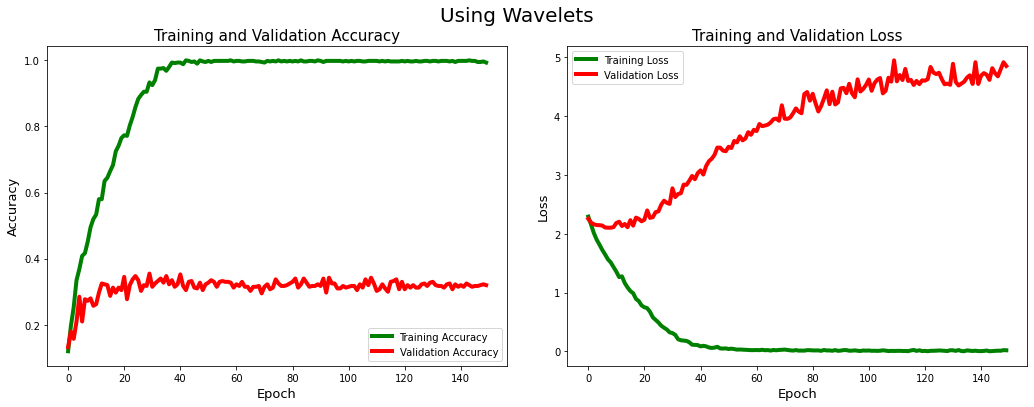

<Figure size 432x288 with 0 Axes>

In [22]:
import pickle
history2 = pickle.load(open('cnn_model_wa_3.pb','rb'))
acc = history2['accuracy']
val_acc = history2['val_accuracy']
loss = history2['loss']
val_loss = history2['val_loss']

epochs_range = range(150)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = 'green', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=15)
ax1.set_ylabel('Accuracy',fontsize=13)
ax1.set_xlabel('Epoch',fontsize=13)

ax2.plot(epochs_range, loss, label='Training Loss',c = 'green', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=15)
ax2.set_ylabel('Loss',fontsize=13)
ax2.set_xlabel('Epoch',fontsize=13)
fig.tight_layout(pad=3.0)
fig.suptitle('Using Wavelets', fontsize=20)
plt.show()
plt.savefig('wave.png')
plt.clf()

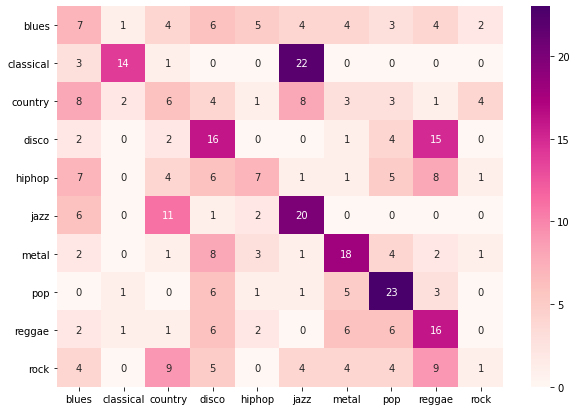

In [23]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png')

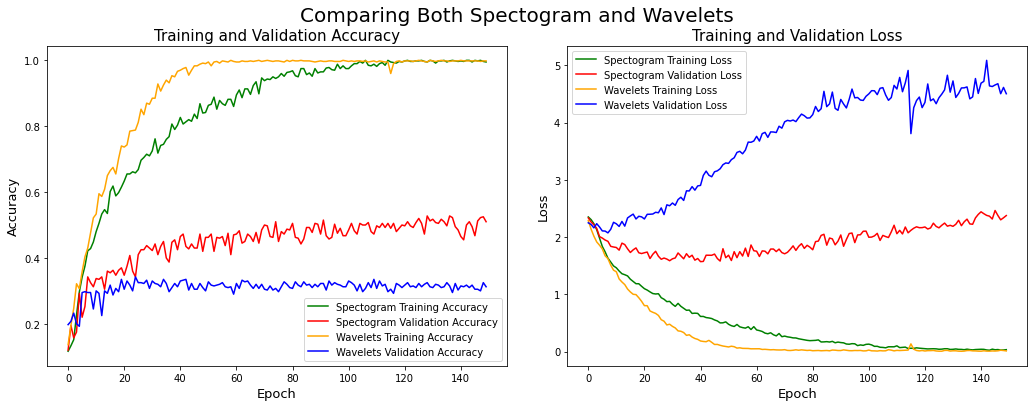

<Figure size 432x288 with 0 Axes>

In [23]:
epochs_range = range(150)
import matplotlib.pyplot as plt
import pickle 
history1 = pickle.load(open('cnn_model_sp_3.pb','rb'))
acc = history1['accuracy']
val_acc = history1['val_accuracy']
loss = history1['loss']
val_loss = history1['val_loss']

history2 = pickle.load(open('cnn_model_wa_3.pb','rb'))
acc1 = history2['accuracy']
val_acc1 = history2['val_accuracy']
loss1 = history2['loss']
val_loss1 = history2['val_loss']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)

ax1.plot(epochs_range, acc, label='Spectogram Training Accuracy', c = 'green')
ax1.plot(epochs_range, val_acc, label='Spectogram Validation Accuracy', c='red')
ax1.plot(epochs_range, acc1, label='Wavelets Training Accuracy', c = 'orange')
ax1.plot(epochs_range, val_acc1, label='Wavelets Validation Accuracy', c='blue')

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=15)
ax1.set_ylabel('Accuracy',fontsize=13)
ax1.set_xlabel('Epoch',fontsize=13)

ax2.plot(epochs_range, loss, label='Spectogram Training Loss',c = 'green')
ax2.plot(epochs_range, val_loss, label='Spectogram Validation Loss', c='red')
ax2.plot(epochs_range, loss1, label='Wavelets Training Loss',c = 'orange')
ax2.plot(epochs_range, val_loss1, label='Wavelets Validation Loss', c='blue')


ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=15)
ax2.set_ylabel('Loss',fontsize=13)
ax2.set_xlabel('Epoch',fontsize=13)
fig.tight_layout(pad=3.0)
fig.suptitle('Comparing Both Spectogram and Wavelets', fontsize=20)
plt.show()
plt.savefig('both.png')
plt.clf()